In [17]:
from time import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv('train.csv')
df.head(2)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0


In [3]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]

print(df0.head(2))
print("-----------------")
print(df1.head(2))

                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   

   target  
0       0  
1       0  
-----------------
                     qid                                      question_text  \
22  0000e91571b60c2fb487  Has the United States become the largest dicta...   
30  00013ceca3f624b09f42  Which babies are more sweeter to their parents...   

    target  
22       1  
30       1  


In [137]:
tfvctr = TfidfVectorizer(max_features=1000,strip_accents="ascii",stop_words='english')

In [138]:
tfidf0 = tfvctr.fit_transform(df0['question_text'])

In [251]:
lda0 = LatentDirichletAllocation(n_components=5,max_iter=2,learning_method="online",\
                                random_state=4,n_jobs=-1)

In [140]:
t0 = time()
lda_0 = lda0.fit(tfidf0)
print("done in %0.3fs." % (time() - t0))

done in 427.118s.


In [141]:
lda_0.components_.shape

(5, 1000)

In [165]:
dct0_tp = dict()

for i, comp in enumerate(lda0.components_):
        vocab_comp = zip(tfvctr.get_feature_names(), comp)
        #print("Topic "+str(i)+": ")
        tpc = "Topic"+str(i+1)
        sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
        #print(sorted_words,"\n")
        lst=[]
        for t in sorted_words:
            #print(t[0],end=" ")
            lst.append(t[0])
        #print("\n")
        
        dct0_tp[tpc] = lst

print(dct0_tp)        

{'Topic1': ['india', 'used', 'job', 'need', 'school', 'buy', 'happen', 'year', 'company', 'old', 'say', 'does', 'business', 'high', 'online', 'getting', 'student', 'number', 'science', 'look'], 'Topic2': ['does', 'make', 'time', 'want', 'quora', 'just', 'money', 'really', 'change', 'using', 'help', 'study', 'water', 'books', '2018', 'girl', 'sex', 'war', '10', 'relationship'], 'Topic3': ['like', 'does', 'use', 'work', 'mean', 'long', 'things', 'indian', 'day', 'engineering', 'university', 'new', 'bad', 'best', '2017', 'good', 'real', 'come', 'social', 'questions'], 'Topic4': ['best', 'did', 'good', 'people', 'way', 'better', 'world', 'possible', 'different', 'learn', 'book', 'college', 'country', 'know', 'thing', 'important', 'live', 'ways', 'experience', 'having'], 'Topic5': ['think', 'life', 'difference', 'person', 'feel', 'start', 'people', 'love', 'did', 'stop', 'don', 'trump', 'like', 'english', 'free', 'examples', 'women', 'years', 'going', 'write']}


In [186]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(12,7), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx+1}", fontdict={"fontsize": 12})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=12)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=12)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

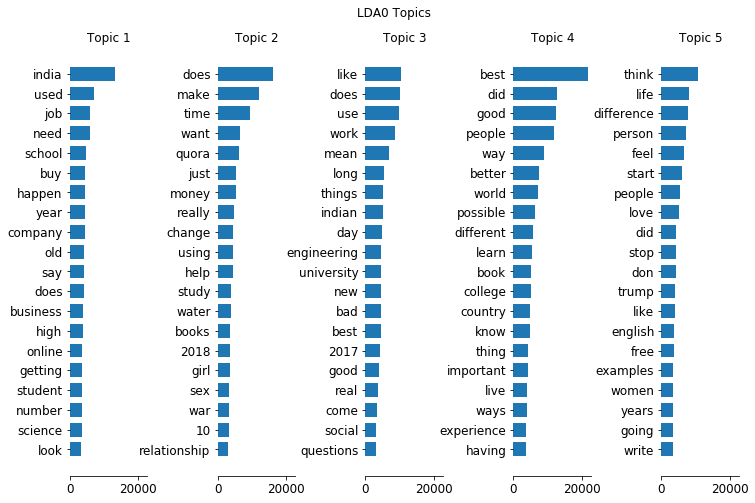

In [187]:
plot_top_words(lda0,tfvctr.get_feature_names(),20,"LDA0 Topics")

In [144]:
lda1 = LatentDirichletAllocation(n_components=5,max_iter=2,learning_method="online",\
                                random_state=0,n_jobs=-1)

In [145]:
tfvctr1 = TfidfVectorizer(max_features=1000,strip_accents="ascii",stop_words='english')

In [146]:
tfidf1 = tfvctr1.fit_transform(df1['question_text'])

In [154]:
t0 = time()
lda1.fit(tfidf1)
print("done in %0.3fs." % (time() - t0))

done in 27.405s.


In [169]:
dct1_tp = dict()

for i, comp in enumerate(lda1.components_):
        vocab_comp = zip(tfvctr1.get_feature_names(), comp)
        #print("Topic "+str(i)+": ")
        tpc = "Topic"+str(i+1)
        sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
        #print(sorted_words,"\n")
        lst=[]
        for t in sorted_words:
            #print(t[0],end=" ")
            lst.append(t[0])
        #print("\n")
        
        dct1_tp[tpc] = lst

print(dct1_tp)  

{'Topic1': ['sex', 'good', 'racist', 'democrats', 'obama', 'china', 'people', 'make', 'america', 'trump', 'look', 'usa', 'atheists', 'want', 'does', 'eat', 'states', 'country', 'did', 'conservatives'], 'Topic2': ['muslims', 'hate', 'india', 'indians', 'muslim', 'people', 'jews', 'believe', 'don', 'god', 'christians', 'hindus', 'children', 'girl', 'quora', 'israel', 'indian', 'right', 'non', 'religion'], 'Topic3': ['trump', 'donald', 'quora', 'does', 'did', 'old', 'modi', 'better', 'bad', 'people', 'year', 'guys', 'rape', 'hillary', 'women', 'republicans', 'think', 'media', 'white', 'asian'], 'Topic4': ['people', 'girls', 'black', 'white', 'gay', 'americans', 'questions', 'woman', 'like', 'kill', 'man', 'indian', 'men', 'use', 'come', 'american', 'islam', 'new', 'dont', 'love'], 'Topic5': ['women', 'men', 'president', 'feel', 'like', 'chinese', 'stupid', 'trump', 'liberals', 'pakistan', 'really', 'people', 'left', 'realize', 'indian', 'best', 'big', 'called', 'isn', 'does']}


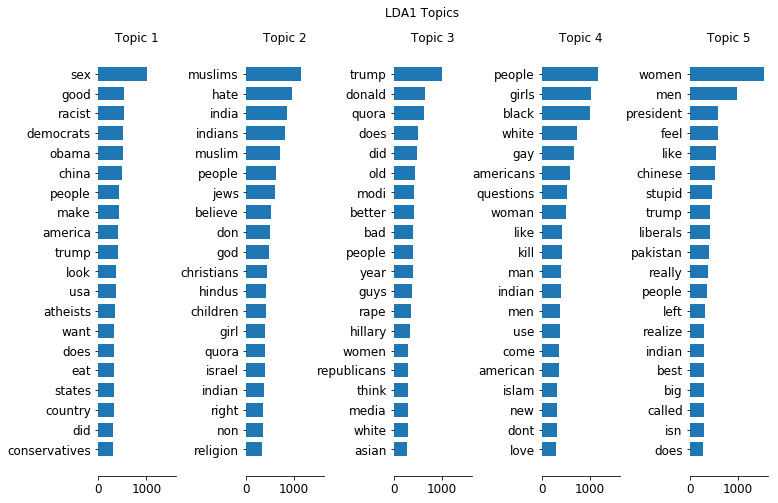

In [183]:
plot_top_words(lda1,tfvctr1.get_feature_names(),20,"LDA1 Topics")

In [43]:
lda_1.components_

array([[0.85951681, 0.76131928, 0.8671438 , ..., 0.69272487, 0.83876483,
        0.75384679],
       [0.86288029, 0.65595857, 0.64021795, ..., 0.75554175, 0.81632321,
        0.63992468],
       [0.82320804, 0.75915808, 0.78569794, ..., 0.63942668, 0.88268749,
        0.69939087],
       [0.94919824, 0.72198456, 0.80860399, ..., 0.71808678, 0.79178303,
        0.78436767],
       [0.66849033, 0.78489017, 0.70921535, ..., 0.7997818 , 0.75265584,
        0.7924799 ]])

In [189]:
dflda = pd.DataFrame()

In [190]:
df1 = pd.read_csv("qis_prcsdtxt_df.csv")

In [224]:
def tpccnt(txt):
    
        lstw = txt.split(" ")
        lsttpc = []
        
        for i in range(1,6):
            
            #print(i,":")
            
            lstcmn = []
            lstcnt = []
            
            ky = "Topic"+str(i)
            
            
            lstcmn =  set(lstw).intersection(set(dct0_tp[ky]))
            #print("1:",lstcmn)
            lstcnt = [lstw.count(w) for w in lstcmn]
            #print("2:",lstcnt)
            sm = np.array(lstcnt).sum()
            #print("3:",sm)
            rt = sm/len(lstw)
            #print("4:",rt)            
            lsttpc.append(np.round(rt,4))
            
            
            #print("----------------")
            
            lstcmn = []
            lstcnt = []
            
            lstcmn =  set(lstw).intersection(set(dct1_tp[ky]))
            #print("5:",lstcmn)
            lstcnt = [lstw.count(w) for w in lstcmn]
            #print("6:",lstcmn)
            sm = np.array(lstcnt).sum()
            #print("7:",sm)
            rt = sm/len(lstw)
            #print("8:",rt)            
            lsttpc.append(np.round(rt,4))
            
            #print("************************")  
            
        return lsttpc
            
              

In [ ]:
a1,a2,a3,a4,a5,a6,a7,a8,a9,a10 = zip(*df1['prcsd_txt'][120:121].apply(lambda x:tpccnt(x)))


In [227]:
t0 = time()
dflda['t10'],dflda['t11'],dflda['t20'],dflda['t21'],dflda['t30'],dflda['t31'],\
dflda['t40'],dflda['t41'],dflda['t50'],dflda['t51'] = zip(*df1['prcsd_txt'].apply(lambda x:tpccnt(x)))
print("done in %0.3fs." % (time() - t0))

done in 247.608s.


In [229]:
print(dflda.shape)
print(dflda.head(5))

(1306122, 10)
      t10     t11     t20     t21     t30     t31     t40     t41     t50  \
0  0.0000  0.0714  0.0000  0.0000  0.0000  0.0714  0.0714  0.0000  0.0714   
1  0.0000  0.0526  0.0000  0.0526  0.0000  0.0526  0.0526  0.0526  0.0526   
2  0.1538  0.1538  0.2308  0.0000  0.1538  0.1538  0.0000  0.0000  0.0000   
3  0.1000  0.1000  0.0000  0.0000  0.0000  0.1000  0.1000  0.0000  0.1000   
4  0.0000  0.0000  0.0625  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

      t51  
0  0.0000  
1  0.0526  
2  0.1538  
3  0.0000  
4  0.0000  


In [222]:
for i in range(1,11):
    print(eval("a"+str(i))[0],end=",")

0.0,0.0,0.0,0.0,0.0769,0.0,0.1538,0.0,0.0,0.0769,

In [231]:
from sklearn.model_selection import train_test_split
X_trn_ldf, X_tst_ldf, y_trn_ldf, y_tst_ldf = train_test_split(dflda, df1['target'], test_size=0.25, random_state=42)

In [232]:
from sklearn.linear_model import LogisticRegression
lgrclf = LogisticRegression()

lgrclf.fit(X_trn_ldf,y_trn_ldf)

LogisticRegression()

In [233]:
y_lda_pred_lbls_lr = lgrclf.predict(X_tst_ldf)

In [236]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_trn_ldf,lgrclf.predict(X_trn_ldf),labels=[0,1]))
print("--------------------------------------------------------------------------")
print(classification_report(y_tst_ldf,y_lda_pred_lbls_lr,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    918720
           1       0.41      0.05      0.08     60871

    accuracy                           0.94    979591
   macro avg       0.67      0.52      0.53    979591
weighted avg       0.91      0.94      0.91    979591

--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    306592
           1       0.40      0.05      0.08     19939

    accuracy                           0.94    326531
   macro avg       0.67      0.52      0.53    326531
weighted avg       0.91      0.94      0.91    326531



In [249]:
dflda_trgt = pd.concat([dflda,df1['target']],axis=1)
print(dflda_trgt.head(2))

   t10     t11  t20     t21  t30     t31     t40     t41     t50     t51  \
0  0.0  0.0714  0.0  0.0000  0.0  0.0714  0.0714  0.0000  0.0714  0.0000   
1  0.0  0.0526  0.0  0.0526  0.0  0.0526  0.0526  0.0526  0.0526  0.0526   

   target  
0       0  
1       0  


In [250]:

corr = dflda_trgt.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,t10,t11,t20,t21,t30,t31,t40,t41,t50,t51,target
t10,1,0.32,0.36,0.12,0.33,0.35,-0.053,-0.011,-0.026,0.31,-0.031
t11,0.32,1,0.47,0.21,0.38,0.63,0.35,0.22,0.34,0.47,0.096
t20,0.36,0.47,1,0.082,0.33,0.38,-0.048,0.0098,-0.0055,0.35,0.0089
t21,0.12,0.21,0.082,1,0.03,0.3,0.18,0.36,0.23,0.27,0.19
t30,0.33,0.38,0.33,0.03,1,0.3,0.22,0.28,0.067,0.57,-0.03
t31,0.35,0.63,0.38,0.3,0.3,1,0.25,0.28,0.47,0.53,0.14
t40,-0.053,0.35,-0.048,0.18,0.22,0.25,1,0.14,0.25,0.26,-0.0058
t41,-0.011,0.22,0.0098,0.36,0.28,0.28,0.14,1,0.42,0.44,0.18
t50,-0.026,0.34,-0.0055,0.23,0.067,0.47,0.25,0.42,1,0.38,0.092
t51,0.31,0.47,0.35,0.27,0.57,0.53,0.26,0.44,0.38,1,0.13


In [252]:
dflda.to_csv("lda_features.csv")

In [253]:
dflda_trgt.iloc[598]

t10       0.0000
t11       0.1667
t20       0.0000
t21       0.0000
t30       0.0000
t31       0.0833
t40       0.0000
t41       0.0000
t50       0.0833
t51       0.1667
target    0.0000
Name: 598, dtype: float64